<a href="https://colab.research.google.com/github/hesamcs/AI/blob/main/hw2speechqustion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install necessary library

In [ ]:
!pip install librosa

In [ ]:
from scipy.io.wavfile import read ,write
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
import librosa

# Question 3.a

### Read Audio

In [ ]:
a,data_au=read("C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\au.wav")
b,data_s=read("C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\s.wav")
c,data_aseman=read("C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\aseman.wav")
print(a,b,c)
print(type(data_au))

16000 16000 16000
<class 'numpy.ndarray'>


C:\Users\Dell\AppData\Local\Temp/ipykernel_11092/2514727099.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  a,data_au=read("C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\au.wav")
C:\Users\Dell\AppData\Local\Temp/ipykernel_11092/2514727099.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  b,data_s=read("C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\s.wav")
C:\Users\Dell\AppData\Local\Temp/ipykernel_11092/2514727099.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  c,data_aseman=read("C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\aseman.wav")


### Get Duration

In [ ]:
du_au=librosa.get_duration(filename="C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\au.wav")
du_s=librosa.get_duration(filename="C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\s.wav")
du_aseman=librosa.get_duration(filename="C:\\Users\\Dell\\hw2_hesam_saki_830400071\\#Q3\\voices\\aseman.wav")
print("طول صوت ها به ترتیب آ ، س ، آسمان:\t\t\t")
print("sec",du_au,"\nsec",du_s,"\nsec",du_aseman)

طول صوت ها به ترتیب آ ، س ، آسمان:			
sec 0.4 
sec 0.2118125 
sec 1.63025


### Computing Energy

In [ ]:
def eng(data):
    energy_sum = 0
    for i in range(len(data)):
        test=int(data[i])
        energy_sum += pow(abs(test),2)
    return energy_sum


energy=[]
energy.append(eng(data_au))
energy.append(eng(data_s))
energy.append(eng(data_aseman))
energy

[33481875293, 1965387780, 121168816001]

### Computing Power 

In [ ]:
power=[]
power.append((energy[0])/len(data_au))
power.append((energy[1])/len(data_s))
power.append((energy[2])/len(data_aseman))
power

[5231543.01453125, 579931.4783121864, 4645331.0842278795]

### Plot Signal 

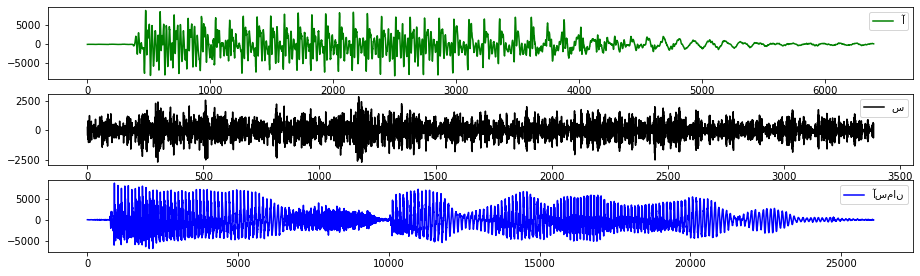

In [ ]:
fig,axs = plt.subplots(3,1)
fig.set_size_inches(15.5, 4.5)
plt.sca(axs[0])
plt.plot(data_au,color='g',linewidth=1.5,label='آ')
plt.legend()

plt.sca(axs[1])
plt.plot(data_s,color='k',linewidth=1.5,label='س')
plt.legend()

plt.sca(axs[2])
plt.plot(data_aseman,color='b',linewidth=1.5,label='آسمان')
plt.legend()

plt.show()

# Question 3.b

### Define average Filter

In [ ]:
def average(data):
    data_average=data
    N=[10,100,1000]
    N=[(2*i)+1 for i in N]
    print(N)
    help=[]


    #21 window
#     print(data_average)
    data_21=[]
    for i in range(len(data_average)-N[0]+1):help=[data_average[j]for j in range(N[0])];men=statistics.mean(help);data_21.append(men);data_average=np.delete(data_average, 0);men=0;help=[]
    data_average=data
#     print(data_average)
    fig, axs_2 = plt.subplots()
    fig.set_size_inches(15.5, 4.5)
    axs_2.set_title("Filter_21")
    axs_2.plot(data_21, color='C0')
    axs_2.set_xlabel("signal")
    plt.show()


    #201 window
    help=[]
    data_201=[]
    for i in range(len(data_average)-N[1]+1):help=[data_average[j]for j in range(N[1])];men=statistics.mean(help);data_201.append(men);data_average=np.delete(data_average, 0);men=0;help=[]
#     print(data_201)
    data_average=data
    fig, axs_3 = plt.subplots()
    fig.set_size_inches(15.5, 4.5)
    axs_3.set_title("Filter_201")
    axs_3.plot(data_201, color='C0')
    axs_3.set_xlabel("signal")
    plt.show()

    #2001 window
    help=[]
    data_2001=[]
    for i in range(len(data_average)-N[2]+1):help=[data_average[j]for j in range(N[2])];men=statistics.mean(help);data_2001.append(men);data_average=np.delete(data_average, 0);men=0
#     print(data_2001)
    data_average=data
    fig, axs_3 = plt.subplots()
    fig.set_size_inches(15.5, 4.5)
    axs_3.set_title("Filter_2001")
    axs_3.plot(data_2001, color='C0')
    axs_3.set_xlabel("signal")
    plt.show()
    
    return data_21,data_201,data_2001


### Run function for س

[21, 201, 2001]


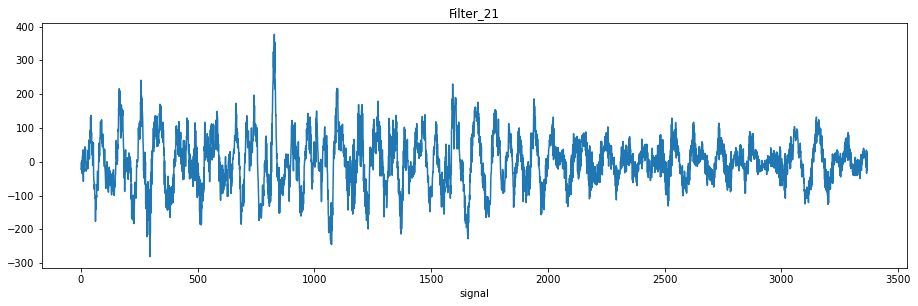

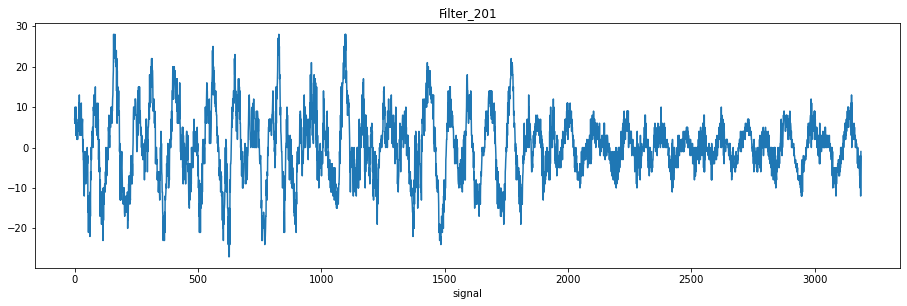

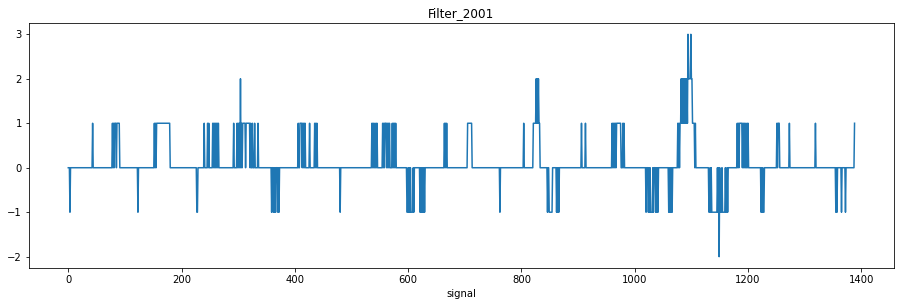

In [ ]:
s_21,s_201,s_2001=average(data_s)

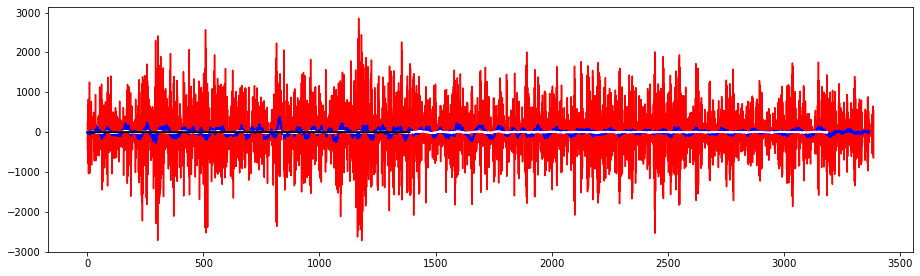

In [ ]:
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(data_s,color='r',linewidth=1.5,label='main')
plt.plot(s_21,color='b',linewidth=2,label='average_filter')
plt.plot(s_201,color='w',linewidth=2,label='average_filter')
plt.plot(s_2001,color='k',linewidth=2,label='average_filter')

### save output for س

In [ ]:
s_21=np.array(s_21)
write("output_s_21.wav",b,s_21)
s_201=np.array(s_201)
write("output_s_201.wav",b,s_201)
s_2001=np.array(s_2001)
write("output_s_2001.wav",b,s_2001)

### Run function for آ

[21, 201, 2001]


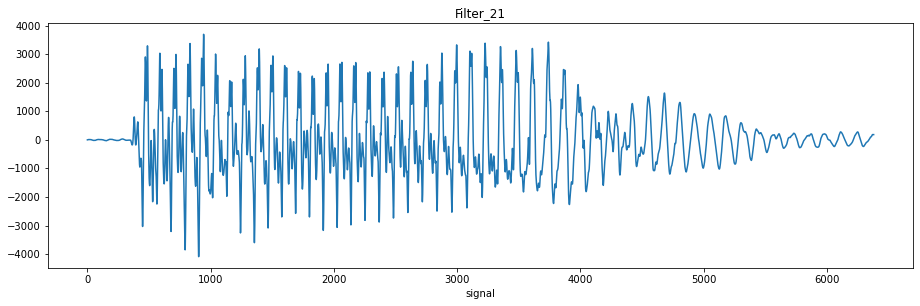

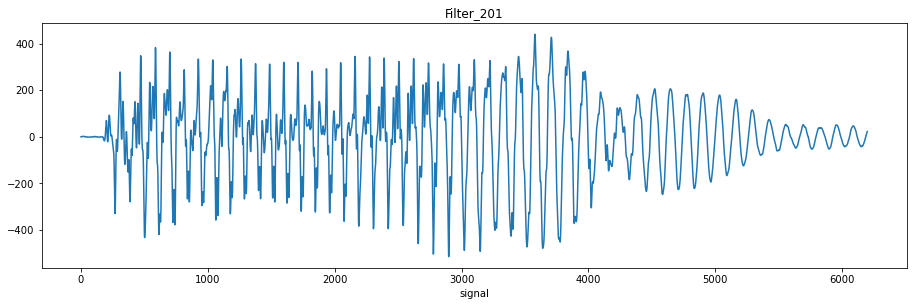

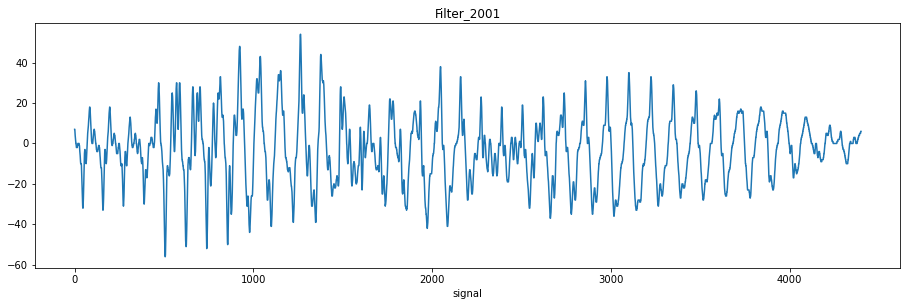

In [ ]:
au_21,au_201,au_2001=average(data_au)

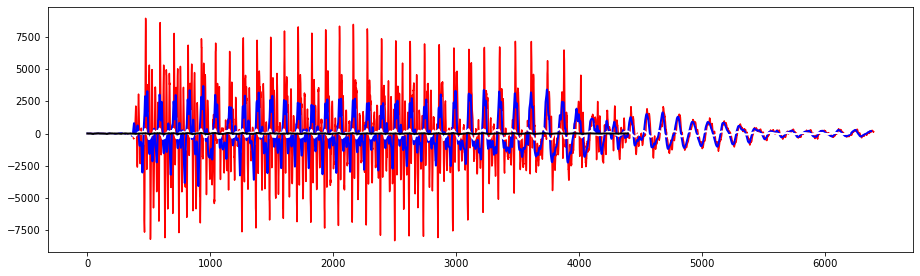

In [ ]:
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(data_au,color='r',linewidth=1.5,label='main')
plt.plot(au_21,color='b',linewidth=2,label='average_filter')
plt.plot(au_201,color='w',linewidth=2,label='average_filter')
plt.plot(au_2001,color='k',linewidth=2,label='average_filter')

### save output for آ

In [ ]:
au_21=np.array(au_21)
write("output_au_21.wav",a,au_21)
au_201=np.array(au_201)
write("output_au_201.wav",a,au_201)
au_2001=np.array(au_2001)
write("output_au_2001.wav",a,au_2001)

### Run function for آسمان

[21, 201, 2001]


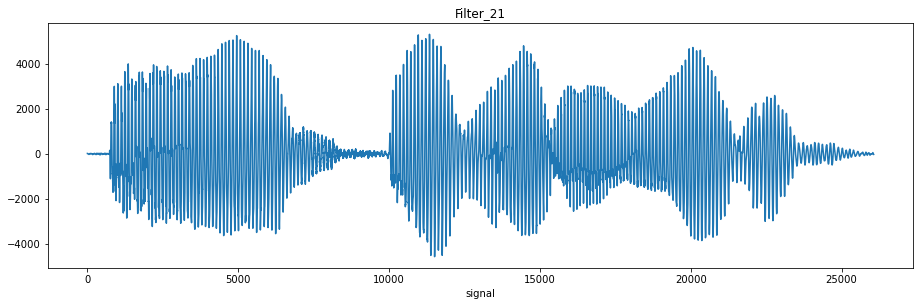

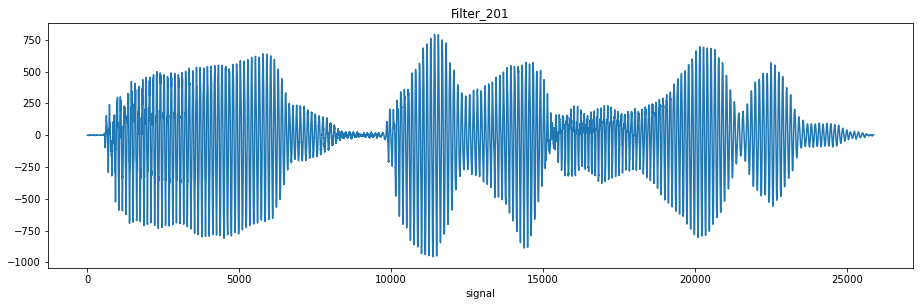

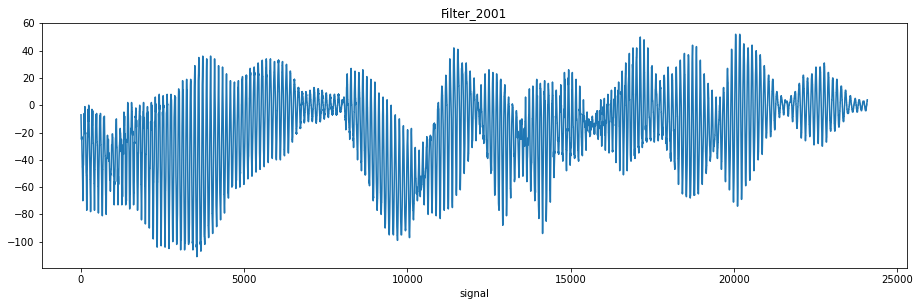

In [ ]:
aseman_21,aseman_201,aseman_2001=average(data_aseman)


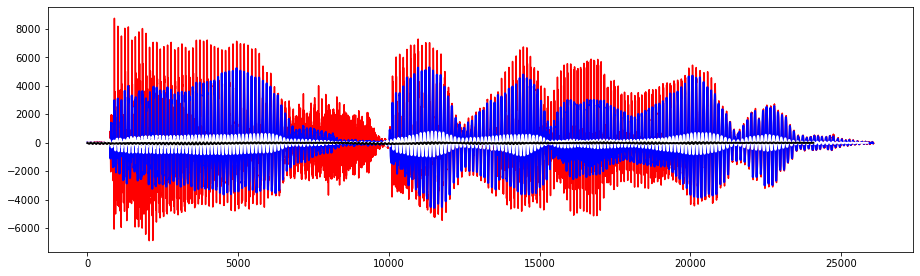

In [ ]:
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(data_aseman,color='r',linewidth=1.5,label='main')
plt.plot(aseman_21,color='b',linewidth=2,label='average_filter')
plt.plot(aseman_201,color='w',linewidth=2,label='average_filter')
plt.plot(aseman_2001,color='k',linewidth=2,label='average_filter')

### save output for آسمان

In [ ]:
aseman_21=np.array(aseman_21)
write("output_aseman_21.wav",c,aseman_21)
aseman_201=np.array(aseman_201)
write("output_aseman_201.wav",c,aseman_201)
aseman_2001=np.array(aseman_2001)
write("output_aseman_2001.wav",c,aseman_2001)

# Question 3.c

## computing fft 

for average س

In [ ]:
fft_s_21=np.fft.fft((np.ones(21))/21,len(data_s))
fft_s_201=np.fft.fft((np.ones(201))/201,len(data_s))
fft_s_2001=np.fft.fft((np.ones(2001))/2001,len(data_s))

### plot fft

<Figure size 432x288 with 0 Axes>

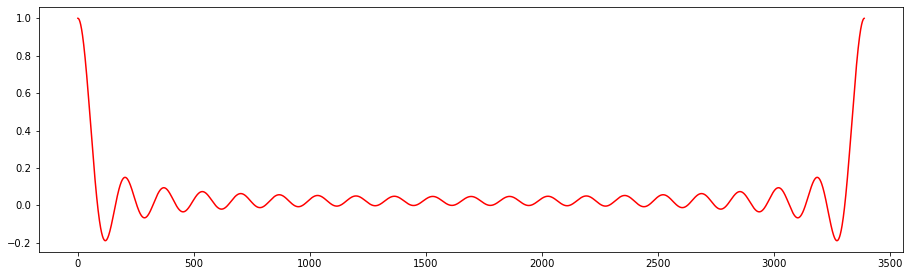

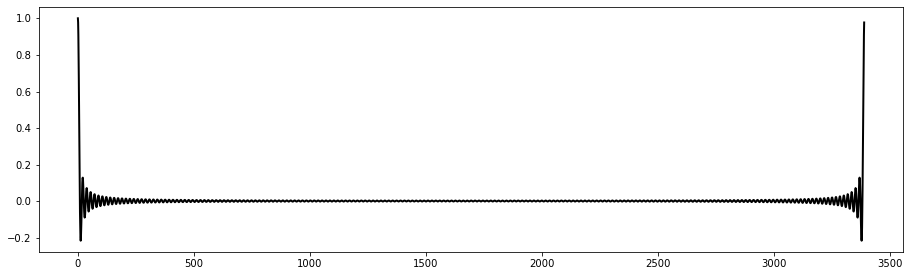

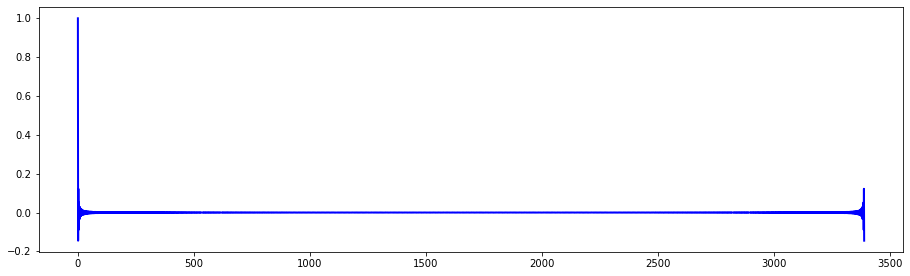

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_s_21),color='r',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_s_201),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_s_2001),color='b',linewidth=2)

### plot angle(phase)

<Figure size 432x288 with 0 Axes>

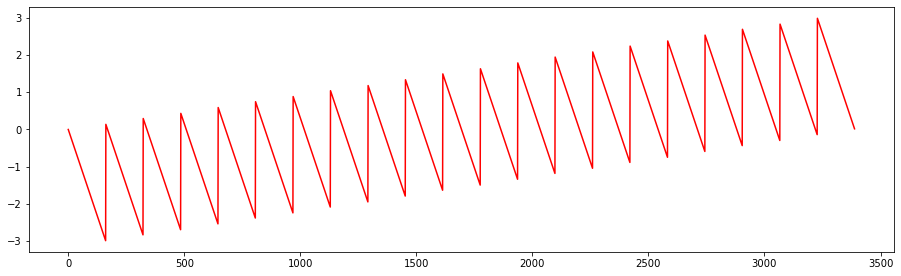

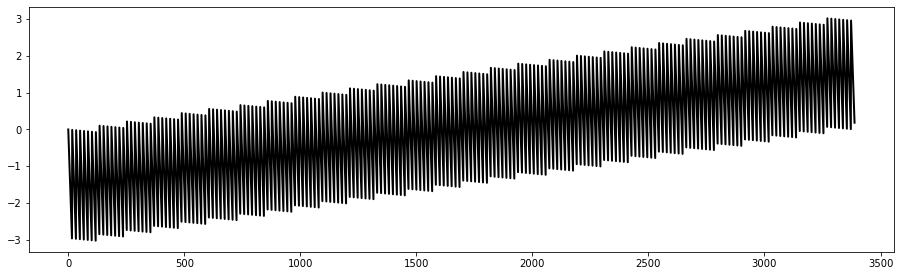

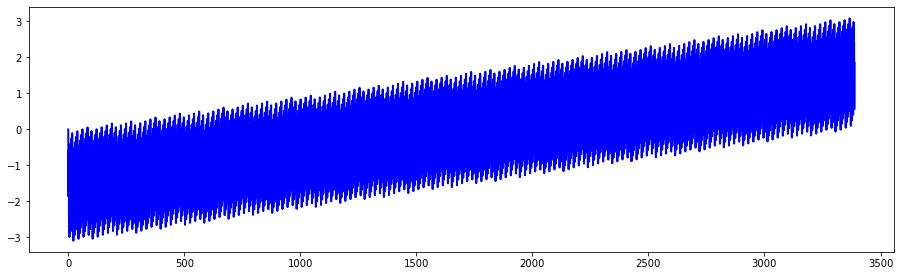

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.angle(fft_s_21),color='r',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.angle(fft_s_201),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.angle(fft_s_2001),color='b',linewidth=2)

for average آ

In [ ]:
fft_au_21=np.fft.fft(((np.ones(21))/21),len(data_au))
fft_au_201=np.fft.fft(((np.ones(201))/201),len(data_au))
fft_au_2001=np.fft.fft(((np.ones(2001))/2001),len(data_au))

### plot fft

<Figure size 432x288 with 0 Axes>

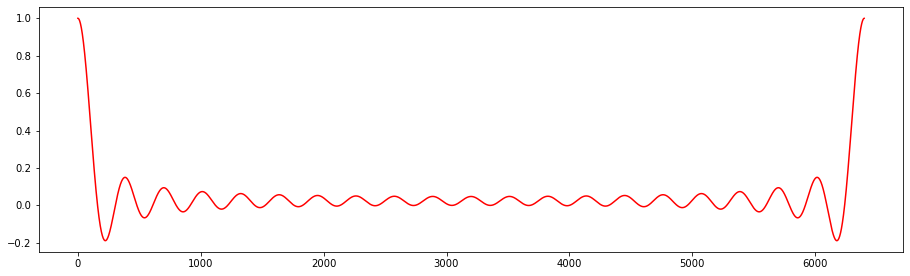

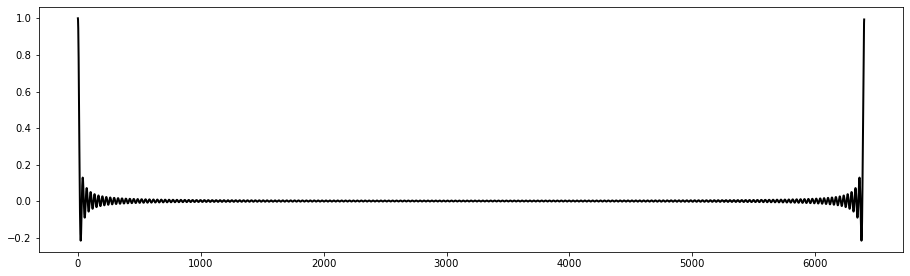

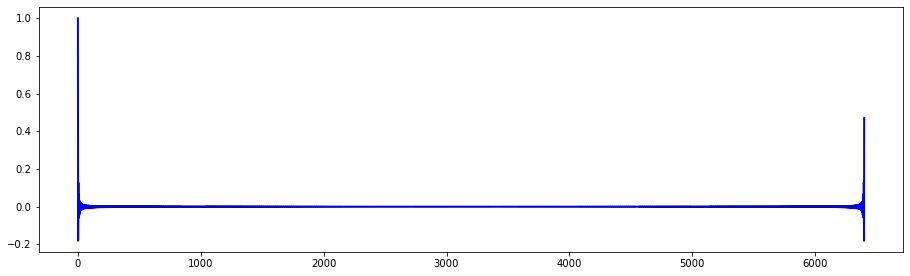

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_au_21),color='r',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_au_201),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_au_2001),color='b',linewidth=2)

### plot angle(phase)

<Figure size 432x288 with 0 Axes>

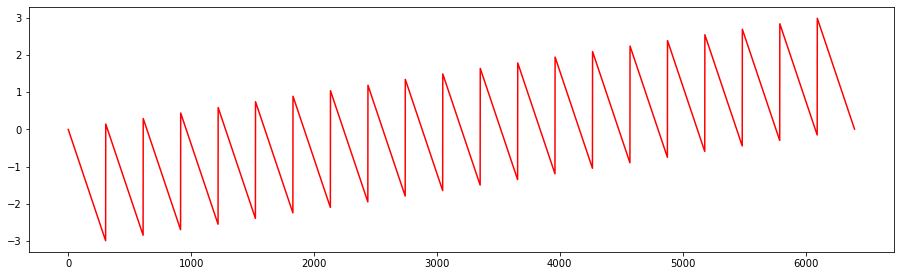

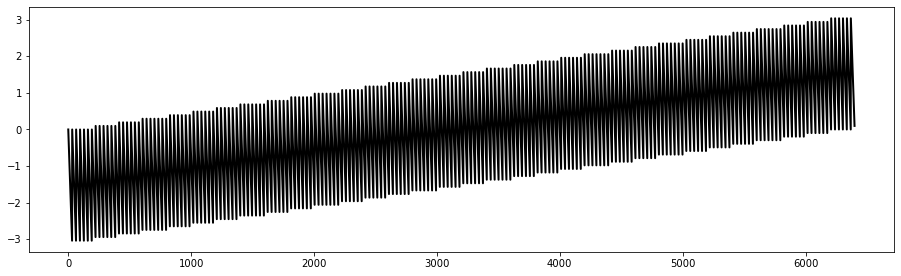

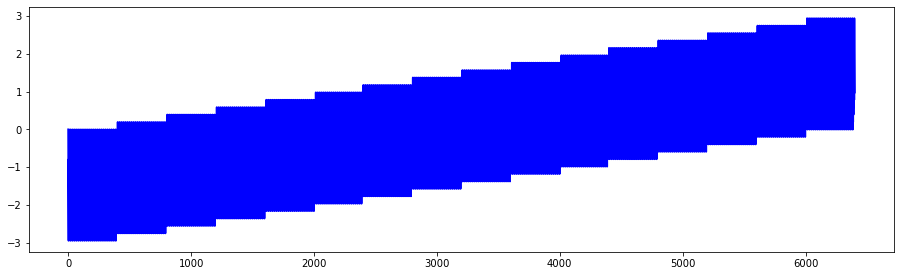

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.angle(fft_au_21),color='r',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.angle(fft_au_201),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.angle(fft_au_2001),color='b',linewidth=2)

for س

In [ ]:
fft_s=np.fft.fft(data_s)

### plot fft

<Figure size 432x288 with 0 Axes>

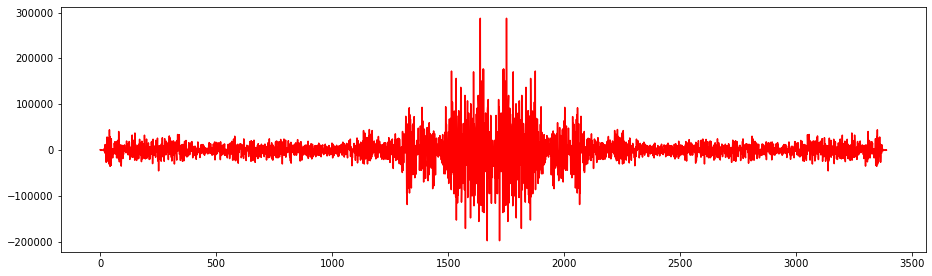

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_s),color='r',linewidth=1.5)

for آ

In [ ]:
fft_au=np.fft.fft(data_au)

### plot fft

<Figure size 432x288 with 0 Axes>

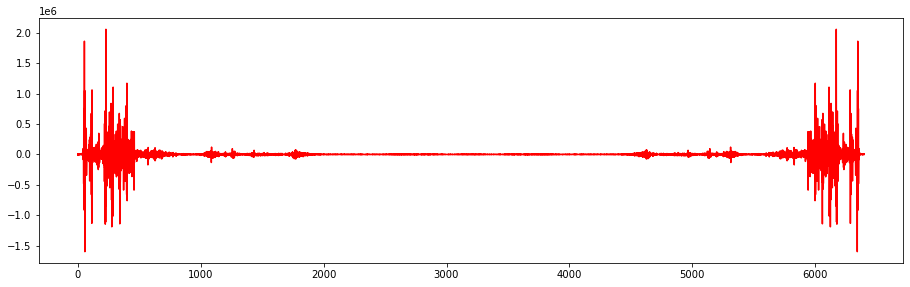

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.real(fft_au),color='r',linewidth=1.5)

### multi fft

In [ ]:
fft_final_s_21=np.real(fft_s[0:len(fft_s)])*np.real(fft_s_21)
fft_final_s_201=np.real(fft_s[0:len(fft_s)])*np.real(fft_s_201)
fft_final_s_2001=np.real(fft_s[0:len(fft_s)])*np.real(fft_s_2001)

fft_final_au_21=np.real(fft_au[0:len(fft_au)])*np.real(fft_au_21)
fft_final_au_201=np.real(fft_au[0:len(fft_au)])*np.real(fft_au_201)
fft_final_au_2001=np.real(fft_au[0:len(fft_au)])*np.real(fft_au_2001)

### plot fft final

<Figure size 432x288 with 0 Axes>

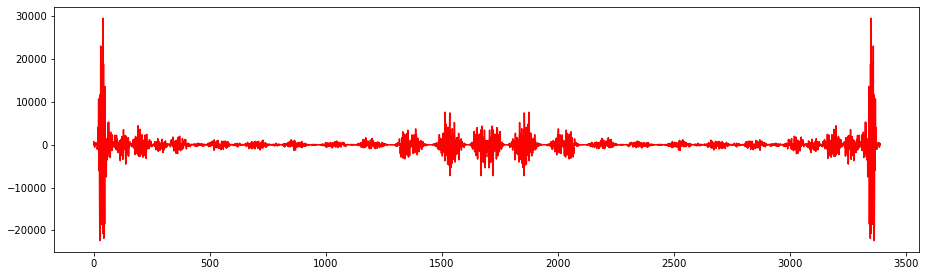

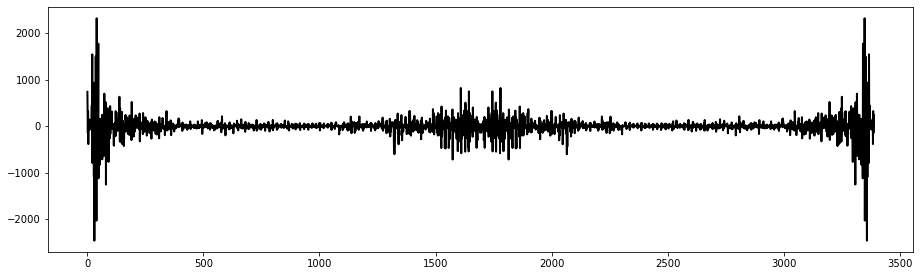

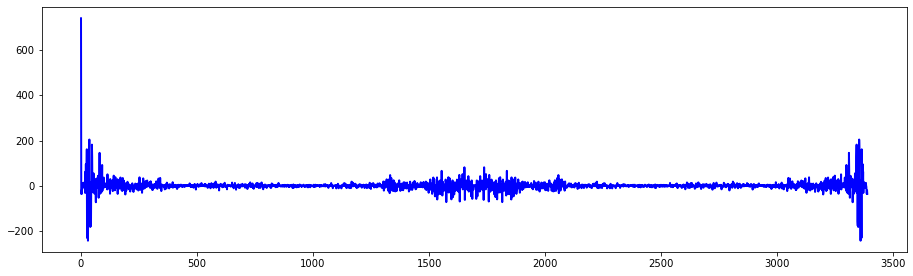

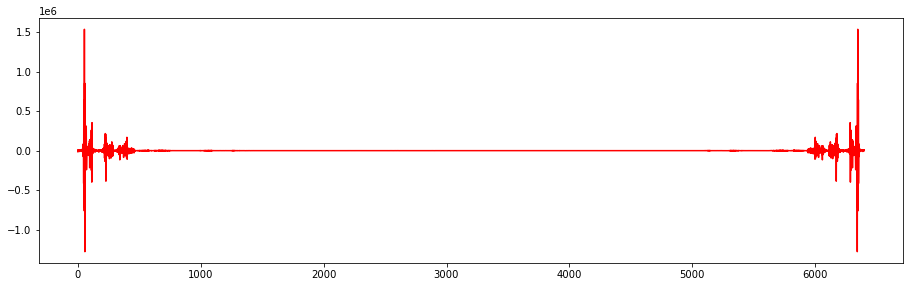

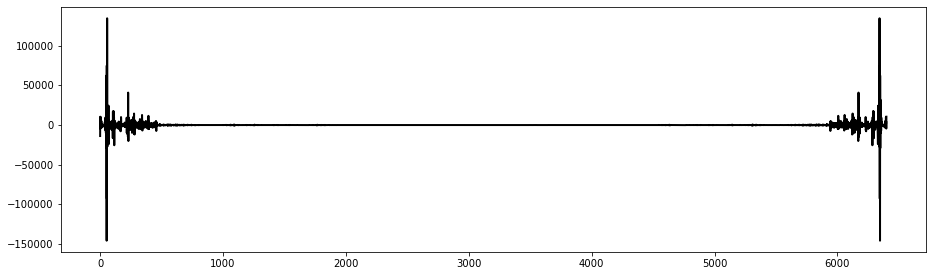

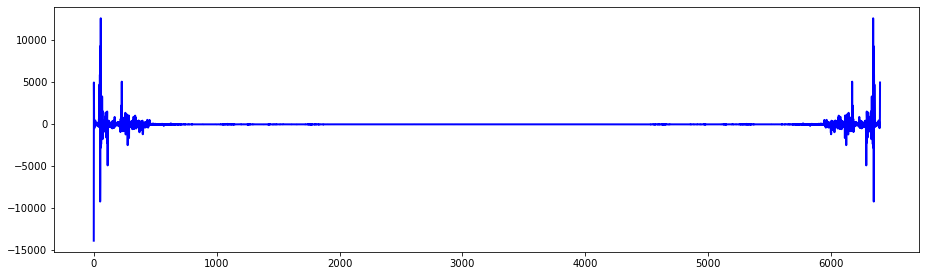

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((fft_final_s_21),color='r',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((fft_final_s_201),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((fft_final_s_2001),color='b',linewidth=2)






plt.figure(4)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((fft_final_au_21),color='r',linewidth=1.5)
plt.figure(5)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((fft_final_au_201),color='k',linewidth=2)
plt.figure(6)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((fft_final_au_2001),color='b',linewidth=2)

### understan what happen

<Figure size 432x288 with 0 Axes>

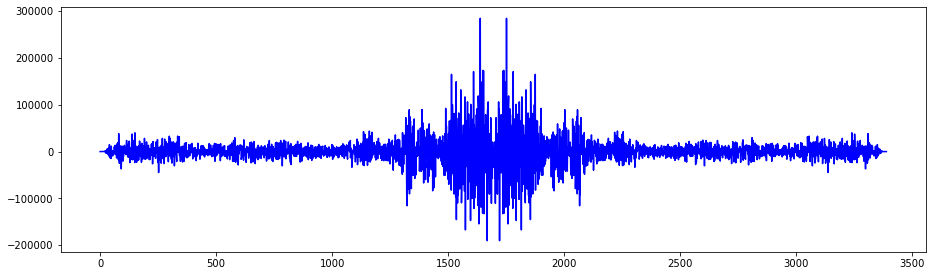

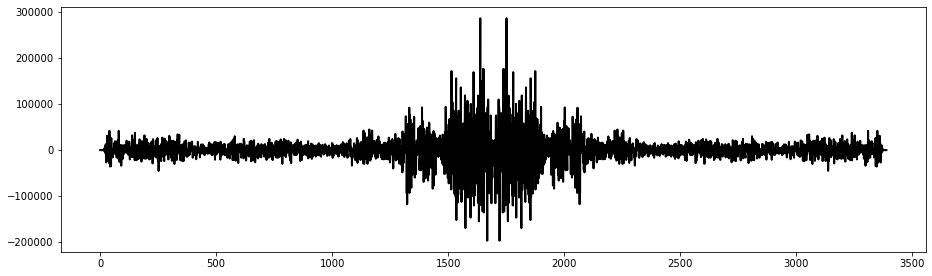

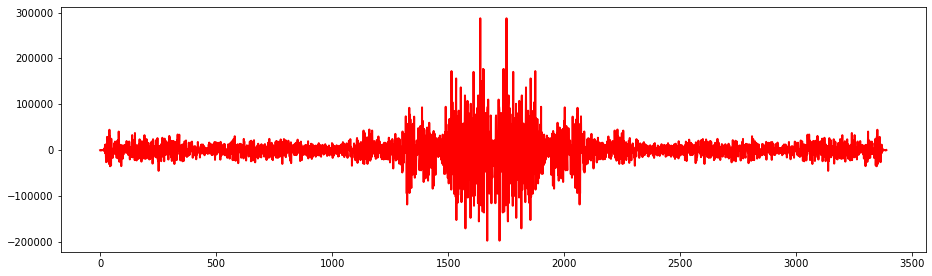

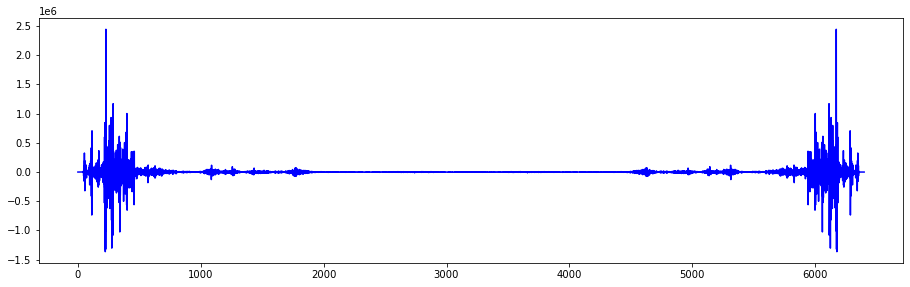

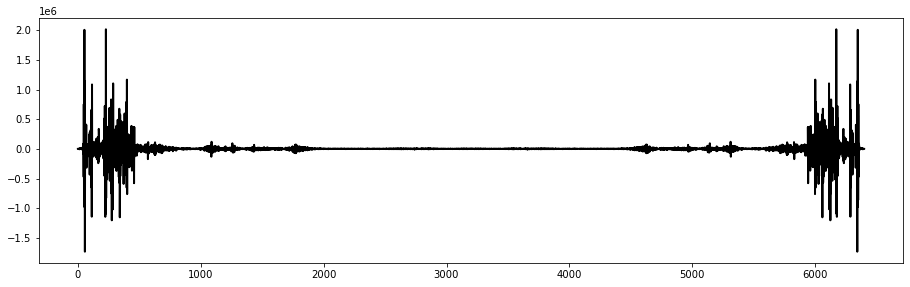

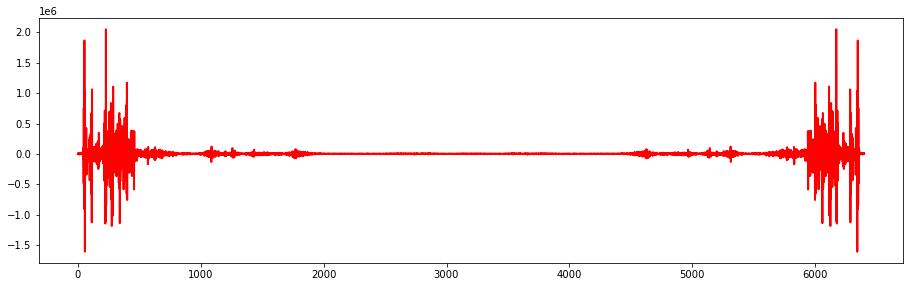

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((-(fft_final_s_21)+np.real(fft_s[0:len(fft_s)])),color='b',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((-(fft_final_s_201)+np.real(fft_s[0:len(fft_s)])),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((-(fft_final_s_2001)+np.real(fft_s[0:len(fft_s)])),color='r',linewidth=2)






plt.figure(4)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((-(fft_final_au_21)+np.real(fft_au[0:len(fft_au)])),color='b',linewidth=1.5)
plt.figure(5)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((-(fft_final_au_201)+np.real(fft_au[0:len(fft_au)])),color='k',linewidth=2)
plt.figure(6)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot((-(fft_final_au_2001)+np.real(fft_au[0:len(fft_au)])),color='r',linewidth=2)







### ifft finall

In [ ]:
ifft_final_s_21=np.fft.ifft((fft_final_s_21+np.angle(fft_s[0:len(fft_s)])))
ifft_final_s_201=np.fft.ifft((fft_final_s_201+np.angle(fft_s[0:len(fft_s)])))
ifft_final_s_2001=np.fft.ifft((fft_final_s_2001+np.angle(fft_s[0:len(fft_s)])))


ifft_final_au_21=np.fft.ifft((fft_final_au_21+np.angle(fft_au[0:len(fft_au)])))
ifft_final_au_201=np.fft.ifft((fft_final_au_201+np.angle(fft_au[0:len(fft_au)])))
ifft_final_au_2001=np.fft.ifft((fft_final_au_2001+np.angle(fft_au[0:len(fft_au)])))

### plot ifft

<Figure size 432x288 with 0 Axes>

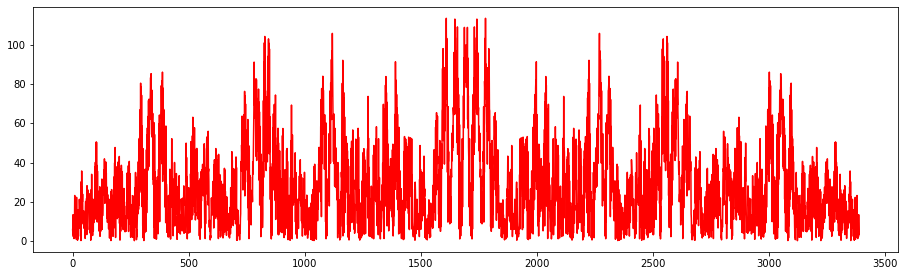

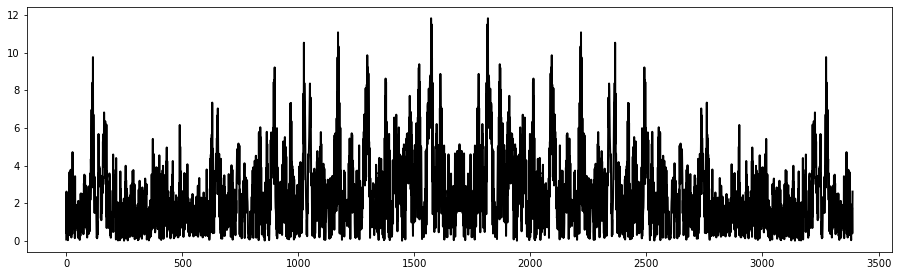

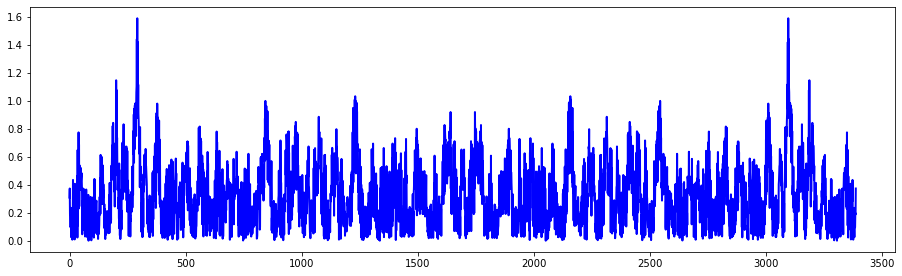

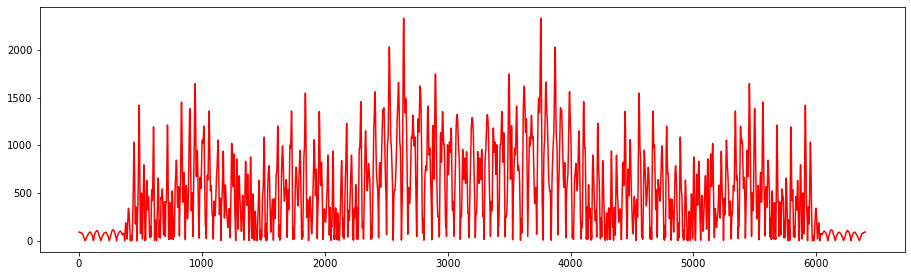

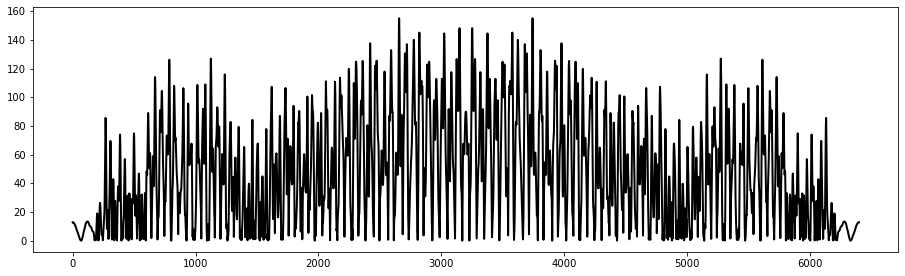

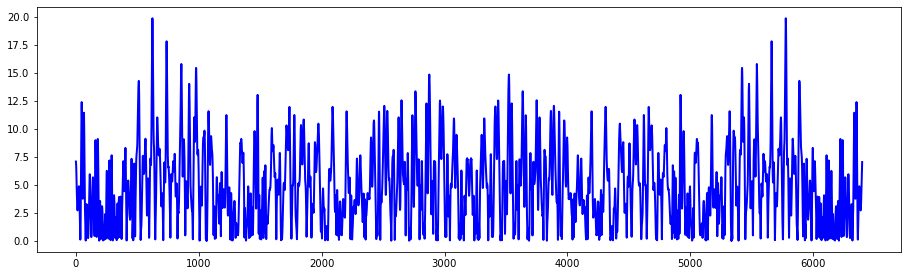

In [ ]:
plt.figure(1)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.absolute(ifft_final_s_21),color='r',linewidth=1.5)
plt.figure(2)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.absolute(ifft_final_s_201),color='k',linewidth=2)
plt.figure(3)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)

plt.plot(np.absolute(ifft_final_s_2001),color='b',linewidth=2)






plt.figure(4)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.absolute(ifft_final_au_21),color='r',linewidth=1.5)
plt.figure(5)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)
plt.plot(np.absolute(ifft_final_au_201),color='k',linewidth=2)
plt.figure(6)
fig, axs_3 = plt.subplots()
fig.set_size_inches(15.5, 4.5)

plt.plot(np.absolute(ifft_final_au_2001),color='b',linewidth=2)

### output

In [ ]:
ifft_final_s_21=np.array(np.abs(ifft_final_s_21))
write("output_s_21_finall.wav",a,ifft_final_s_21)
ifft_final_s_201=np.array(np.abs(ifft_final_s_201))
write("output_s_201_finall.wav",a,ifft_final_s_201)
ifft_final_s_2001=np.array(np.abs(ifft_final_s_2001))
write("output_s_2001_finall.wav",a,ifft_final_s_2001)



ifft_final_au_21=np.array(np.abs(ifft_final_au_21))
write("output_au_21_finall.wav",a,ifft_final_au_21)
ifft_final_au_201=np.array(np.abs(ifft_final_au_201))
write("output_au_201_finall.wav",a,ifft_final_au_201)
ifft_final_au_2001=np.array(np.abs(ifft_final_au_2001))
write("output_au_2001_finall.wav",a,ifft_final_au_2001)

# Question 3.d

### function for computing energy

In [ ]:
# Parseval theorem energy
def ParsevalTheorem(data):
    energy_sum = 0
    for i in range(len(data)):
        test=int(data[i])
        energy_sum += pow(abs(test),2)
    return energy_sum

### computing energy of (s and au) and computing energy of (s and au) in frequancy domain

In [ ]:
fourierTransform = np.fft.fft(data_s)
print("fourier energy: ", ParsevalTheorem(np.abs(fourierTransform))/len(fourierTransform))
print("main energy: ", ParsevalTheorem(data_s))

fourier energy:  1965359695.3889053
main energy:  1965387780


###  

In [ ]:
fourierTransform = np.fft.fft(data_au)
print("fourier energy: ", ParsevalTheorem(np.abs(fourierTransform))/len(fourierTransform))
print("main energy: ", ParsevalTheorem(data_au))

fourier energy:  33481815744.257187
main energy:  33481875293
